# Análise de Noticias do Equador

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.text import TSNEVisualizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/WebScraping-covid%2Becuador.csv'
not_equ = pd.read_csv(url)
not_equ.drop('Unnamed: 0',axis=1,inplace=True)
not_equ.head()

,Titulo,Data,URL da noticia
0,En 2019 hubo récord de donantes y trasplantes ...,01-01-2020,https://www.perfil.com/noticias/salud/2019-rec...
1,Diez años de grieta son una década perdida par...,01-01-2020,https://www.cronista.com/columnistas/Diez-anos...
2,General Las Heras: gigantesco incendio destruy...,01-01-2020,https://www.perfil.com/noticias/actualidad/gen...
3,"Sale $ 50, un ""todo por 2 pesos"" renovado",01-01-2020,https://www.cronista.com/pyme/negocios-pyme/Sa...
4,Las apps que eligen los influencers de viajes ...,01-01-2020,https://www.infobae.com/turismo/2020/01/01/las...


In [ ]:
not_equ.tail()

,Titulo,Data,URL da noticia
17615,Venta de vehículos nuevos se recupera en Ecuad...,31-12-2021,https://elmercurio.com.ec/2021/12/31/venta-de-...
17616,Qué tipos de pruebas de COVID-19 hay en el mer...,31-12-2021,https://www.eluniverso.com/larevista/salud/que...
17617,Monigotes de año viejo ocupan calles de Ecuado...,31-12-2021,https://www.prensa-latina.cu/2021/12/31/monigo...
17618,"Leftist Presidential Candidates in Brazil, Col...",31-12-2021,https://foreignpolicy.com/2021/12/31/petro-lul...
17619,Renovar energías y disfrutar más del mar y su ...,31-12-2021,https://www.eluniverso.com/noticias/ecuador/re...


In [ ]:
not_equ['Data'] = pd.to_datetime(not_equ['Data'],format='%d-%m-%Y')
not_equ.head()

,Titulo,Data,URL da noticia
0,En 2019 hubo récord de donantes y trasplantes ...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...
1,Diez años de grieta son una década perdida par...,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...
2,General Las Heras: gigantesco incendio destruy...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...
3,"Sale $ 50, un ""todo por 2 pesos"" renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...
4,Las apps que eligen los influencers de viajes ...,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...


In [ ]:
# Removendo os stop words das colunas descripion e title
stop = stopwords.words(['spanish','english'])

not_equ['Titulo'] = not_equ['Titulo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
not_equ.head()

,Titulo,Data,URL da noticia
0,En 2019 récord donantes trasplantes órganos Ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...
1,Diez años grieta década perdida Argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...
2,General Las Heras: gigantesco incendio destruy...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...
3,"Sale $ 50, ""todo 2 pesos"" renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...
4,Las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...


In [ ]:
# Aplicando lemantização
def lema(coluna):
  lema = []
  wnl = WordNetLemmatizer()
  lista = list(coluna)
  for i in range(len(lista)):
    lista_le = nltk.word_tokenize(lista[i])
    junta = ' '.join([wnl.lemmatize(words) for words in lista_le])
    lema.append(junta)
  coluna = lema
  return coluna

In [ ]:
not_equ['Titulo'] = lema(not_equ['Titulo'])
not_equ.head()

,Titulo,Data,URL da noticia
0,En 2019 récord donantes trasplantes órganos Ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...
1,Diez años grieta década perdida Argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...
2,General Las Heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...
3,"Sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...
4,Las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...


In [ ]:
not_equ['Ano'] = not_equ['Data'].dt.year
not_equ.head()

,Titulo,Data,URL da noticia,Ano
0,En 2019 récord donantes trasplantes órganos Ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020
1,Diez años grieta década perdida Argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020
2,General Las Heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020
3,"Sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020
4,Las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020


In [ ]:
not_equ['Titulo'] = not_equ['Titulo'].str.lower()

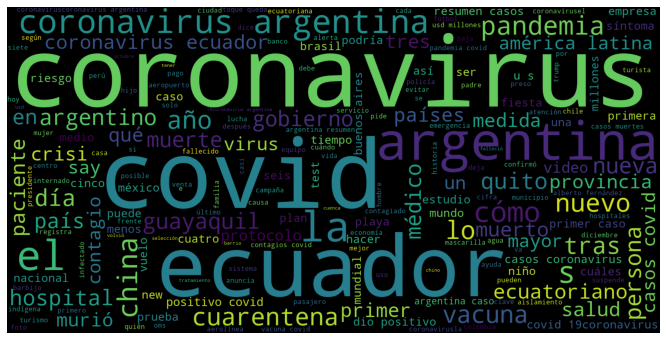

In [ ]:
juntar_texto = ''.join(s for s in not_equ[not_equ['Ano']==2020]['Titulo'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

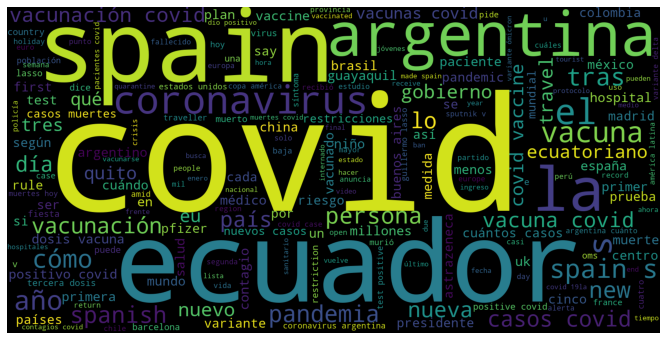

In [ ]:
juntar_texto2 = ''.join(s for s in not_equ[not_equ['Ano']==2021]['Titulo'])
wordcloud2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud2);

In [ ]:
not_equ['Titulo'] = not_equ['Titulo'].str.replace('coronavirus','covid')

## Kmeans

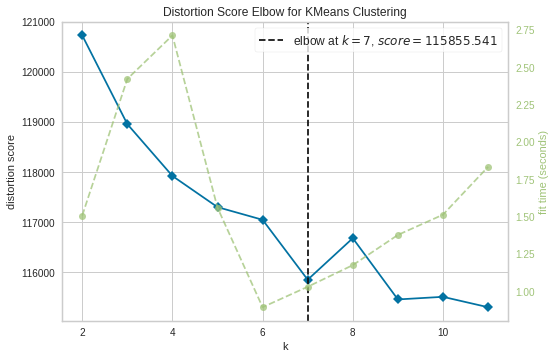

In [ ]:
count_vec = CountVectorizer()
tit_not_ma = count_vec.fit_transform(not_equ['Titulo'])

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(tit_not_ma)
visualizer.show()

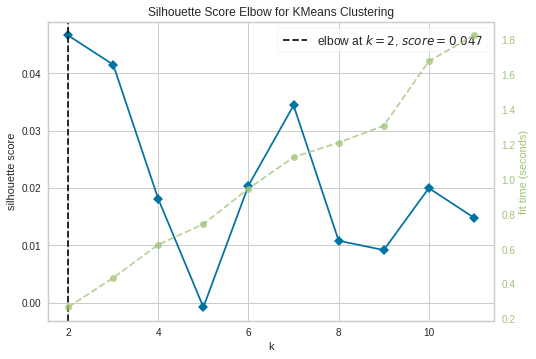

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,12),metric='silhouette')
visualizer.fit(tit_not_ma)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tit_not_ma)
not_equ['Cluster'] = kmeans.labels_
not_equ.head()

,Titulo,Data,URL da noticia,Ano,Cluster
0,en 2019 récord donantes trasplantes órganos ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020,0
1,diez años grieta década perdida argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020,0
2,general las heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020,0
4,las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020,0


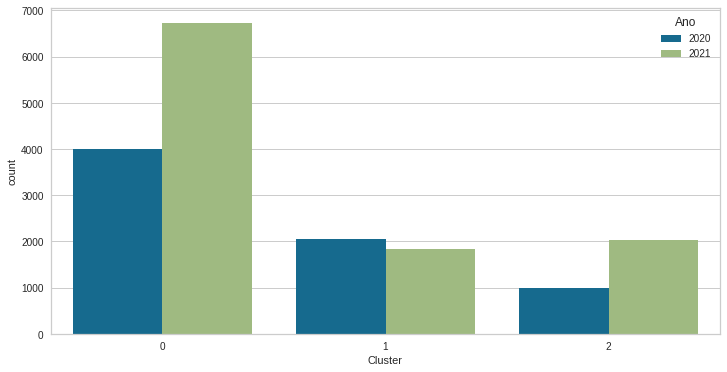

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster',data=not_equ,hue='Ano')

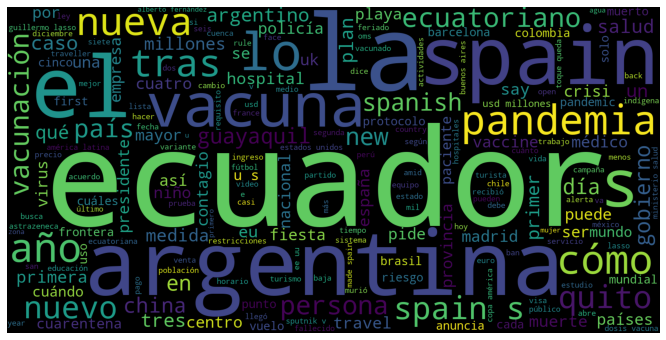

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_equ[not_equ['Cluster']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

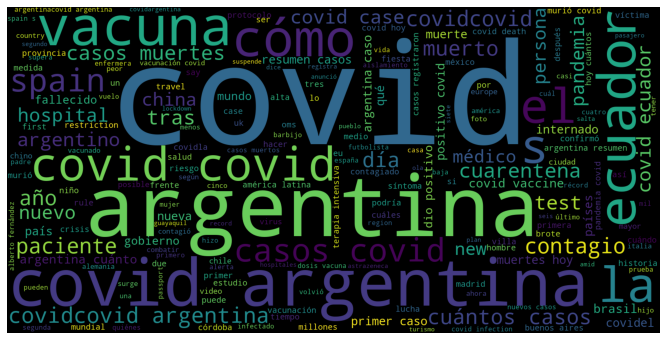

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_equ[not_equ['Cluster']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

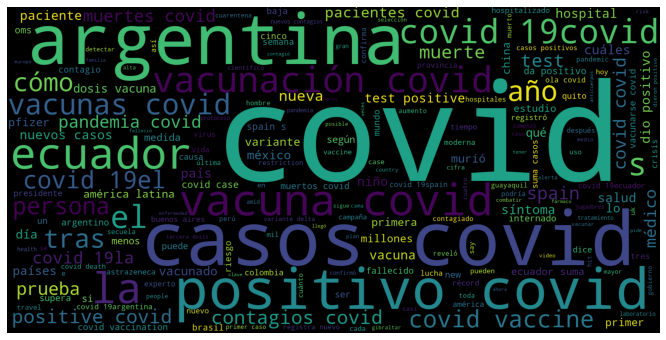

In [ ]:
juntar_texto_cluster_2 = ''.join(s for s in not_equ[not_equ['Cluster']==2]['Titulo'])
wordcloud_cluster_2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_2);

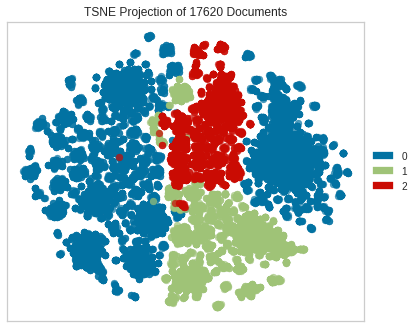

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(tit_not_ma, not_equ.Cluster)
tsne.show()

## Kmedoids

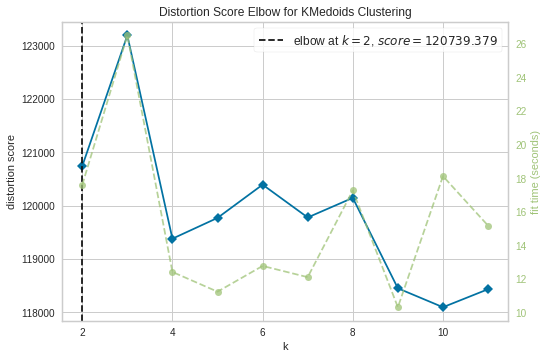

In [ ]:
kmedoids = KMedoids(init='k-medoids++')

visualizer2 = KElbowVisualizer(kmedoids, k=(2,12))
visualizer2.fit(tit_not_ma)
visualizer2.show()

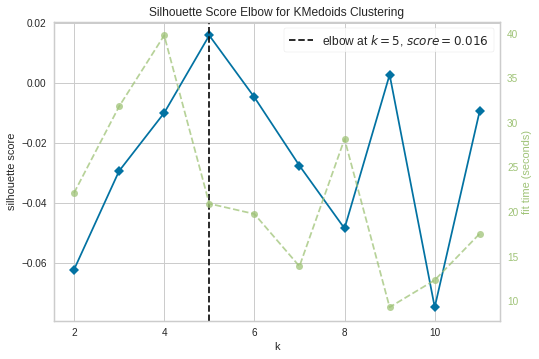

In [ ]:

visualizer2 = KElbowVisualizer(kmedoids, k=(2,12),metric='silhouette')
visualizer2.fit(tit_not_ma)
visualizer2.show()

In [ ]:
kmedoids = KMedoids(n_clusters=5,init='k-medoids++').fit(tit_not_ma)

not_equ['Cluster2'] = kmedoids.labels_
not_equ.head()

,Titulo,Data,URL da noticia,Ano,Cluster,Cluster2
0,en 2019 récord donantes trasplantes órganos ar...,2020-01-01,https://www.perfil.com/noticias/salud/2019-rec...,2020,0,0
1,diez años grieta década perdida argentina,2020-01-01,https://www.cronista.com/columnistas/Diez-anos...,2020,0,0
2,general las heras : gigantesco incendio destru...,2020-01-01,https://www.perfil.com/noticias/actualidad/gen...,2020,0,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,https://www.cronista.com/pyme/negocios-pyme/Sa...,2020,0,0
4,las apps eligen influencers viajes conocer mundo,2020-01-01,https://www.infobae.com/turismo/2020/01/01/las...,2020,0,0


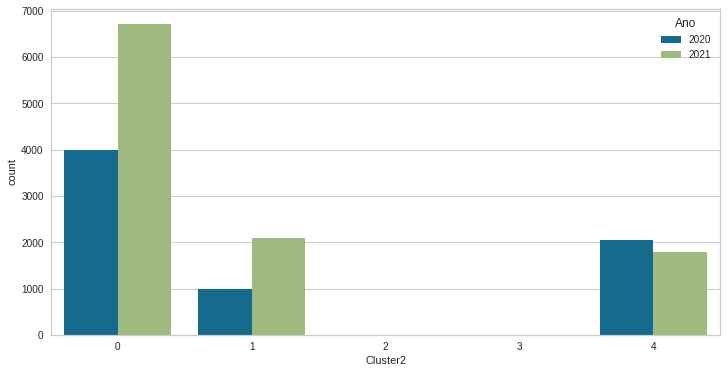

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster2',data=not_equ,hue='Ano')

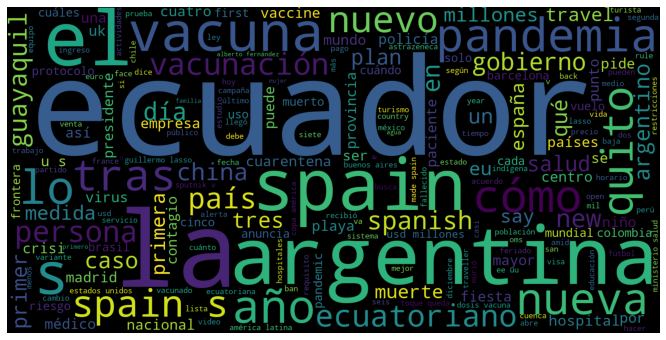

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_equ[not_equ['Cluster2']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

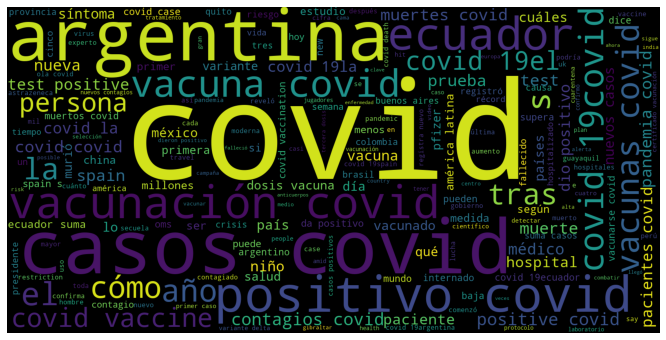

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_equ[not_equ['Cluster2']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

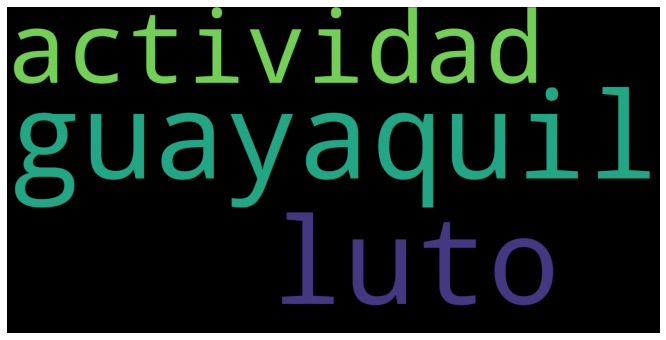

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_equ[not_equ['Cluster2']==2]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

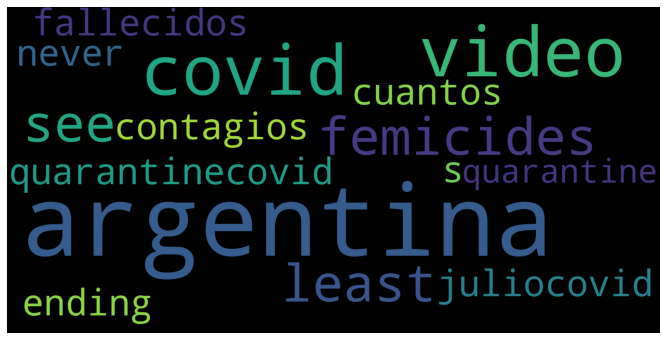

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_equ[not_equ['Cluster2']==3]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

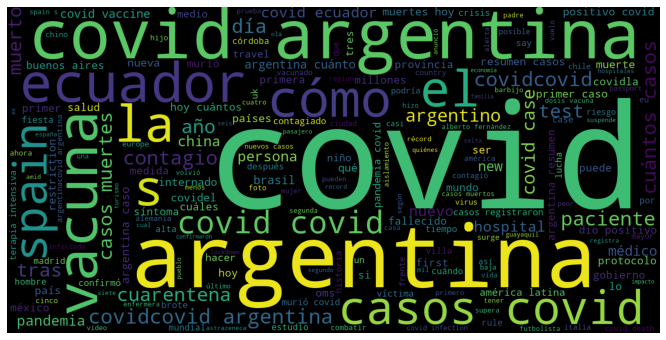

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_equ[not_equ['Cluster2']==4]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

In [ ]:
not_equ = not_equ[['Titulo','Data','Cluster']]
not_equ.head()

,Titulo,Data,Cluster
0,en 2019 récord donantes trasplantes órganos ar...,2020-01-01,0
1,diez años grieta década perdida argentina,2020-01-01,0
2,general las heras : gigantesco incendio destru...,2020-01-01,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,0
4,las apps eligen influencers viajes conocer mundo,2020-01-01,0


In [ ]:
not_equ.to_csv('Titulos Noticias Equador.csv')